In [ ]:

!pip install -q --upgrade ipython==5.5.0
!pip install -q --upgrade ipykernel~=4.10

     |████████████████████████████████| 112kB 3.5MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
fake= pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Fake.csv')
true= pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/True.csv')
fake['Label']= 0
true['Label']= 1
fake.head(5)

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true.head(5)

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:

print("shape of fake data: ",fake.shape)
print("shape of true data: ",true.shape)

shape of fake data:  (23481, 5)
shape of true data:  (21417, 5)


In [ ]:
data=[fake,true]
data=pd.concat(data)
data.reset_index(inplace=True)
data= data.drop(columns="index")
y= data.loc[:,'Label']
X=data.drop(columns=["Label","date"], axis=1)
X

,title,text,subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
## Data Cleaning
import re
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
def clean_round1(text):
    text= text.lower()
    tokens= text.split() # This will create each word as seperate element of list after eaxh space
    table= str.maketrans('','', string.punctuation) # this remove punctuations
    tokens= [w.translate(table) for w in tokens] # by looping over each element of token list
        #This not remove punctuations from each word eg "beauty's" converted to "beautys"
    tokens= [word for word in tokens if word.isalpha()] # removes numbers.
    tokens= [word for word in tokens if not word in stop_words]
    return tokens
round1= lambda x: clean_round1(x)
X_title_clean= pd. DataFrame(X.title.apply(round1))
X_text_clean= pd. DataFrame(X.text.apply(round1))
data_clean=[X_title_clean,X_text_clean]
data_clean= pd.concat(data_clean, axis=1)
data_clean

,title,text
0,"[donald, trump, sends, embarrassing, new, eve,...","[donald, trump, wish, americans, happy, new, y..."
1,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev..."
2,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,..."
3,"[trump, obsessed, even, name, coded, website, ...","[christmas, day, donald, trump, announced, wou..."
4,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ..."
...,...,...
44893,"[fully, committed, nato, backs, new, us, appro...","[brussels, reuters, nato, allies, tuesday, wel..."
44894,"[lexisnexis, withdrew, two, products, chinese,...","[london, reuters, lexisnexis, provider, legal,..."
44895,"[minsk, cultural, hub, becomes, authorities]","[minsk, reuters, shadow, disused, sovietera, f..."
44896,"[vatican, upbeat, possibility, pope, francis, ...","[moscow, reuters, vatican, secretary, state, c..."


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer= Tokenizer() 
tokenizer.fit_on_texts(data_clean.loc[:,'text']) #Each unique word in lines list will have a numerical value assigned
sequences1= tokenizer.texts_to_sequences(data_clean.loc[:,'text'])
#sequences will have list of integer values created by tokenizer
sequences= np.array(sequences1)
print("shape of sequence", sequences.shape)
print("Shape of X ", X.shape)

shape of sequence (44898,)
Shape of X  (44898, 3)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
pad_seq= pad_sequences(sequences)
X_train, X_test, y_train, y_test= train_test_split(pad_seq, y, train_size=.33)
print(X_train.shape)
print(y_train.shape)
X_train
print(pad_seq.shape)

(14816, 4818)
(14816,)
(44898, 4818)


In [ ]:
X_train

array([[     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,     80,     77,   7812],
       [     0,      0,      0, ...,  39688,    923,     26],
       ...,
       [     0,      0,      0, ...,  13136,   1657,    352],
       [     0,      0,      0, ...,   2326,   5199,    352],
       [     0,      0,      0, ..., 168222,    672,      2]], dtype=int32)

In [ ]:
vocab_len= len(tokenizer.word_index)+1
vocab_len

199949

In [ ]:
max_len=0
for i in range(44898):
    l= len(data_clean.text[i])
    if(l>max_len):
        max_len=l
max_len

4818

In [ ]:
from tensorflow.keras.layers import Dropout
model= Sequential()
model.add(Embedding(vocab_len, 100, input_length=X_train.shape[1]))
model.add(Dropout(.3))
model.add(LSTM(100))
model.add(Dropout(.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4818, 100)         19994900  
_________________________________________________________________
dropout (Dropout)            (None, 4818, 100)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 20,085,501
Trainable params: 20,085,501
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, batch_size= 300, epochs=10)

Epoch 1/10
50/50 [==============================] - 86s 2s/step - loss: 0.0207 - accuracy: 0.9944
Epoch 2/10
50/50 [==============================] - 87s 2s/step - loss: 0.0060 - accuracy: 0.9986
Epoch 3/10
50/50 [==============================] - 87s 2s/step - loss: 0.0036 - accuracy: 0.9991
Epoch 4/10
50/50 [==============================] - 86s 2s/step - loss: 0.0041 - accuracy: 0.9989
Epoch 5/10
50/50 [==============================] - 86s 2s/step - loss: 0.0023 - accuracy: 0.9995
Epoch 6/10
50/50 [==============================] - 86s 2s/step - loss: 7.9305e-04 - accuracy: 0.9998
Epoch 7/10
50/50 [==============================] - 86s 2s/step - loss: 2.6599e-04 - accuracy: 0.9999
Epoch 8/10
50/50 [==============================] - 87s 2s/step - loss: 5.1055e-04 - accuracy: 0.9999
Epoch 9/10
50/50 [==============================] - 87s 2s/step - loss: 5.7913e-05 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 86s 2s/step - loss: 2.7951e-05 - accuracy: 1.0000

In [ ]:
y_predict=model.predict_classes(X_test)
y_predict.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(30082, 1)

In [ ]:
loss_value, acc= model.evaluate(X_test, y_test)
print(loss_value)
print(acc)

941/941 [==============================] - 190s 202ms/step - loss: 0.1097 - accuracy: 0.9822
0.10970637202262878
0.9821820259094238


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9821820357688984

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


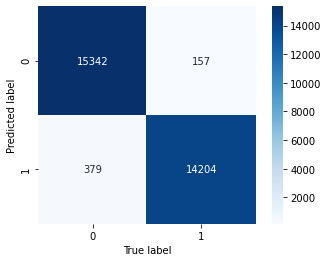

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm.T, square= True, annot= True, fmt='d',cmap='Blues')
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()